<a href="https://colab.research.google.com/github/velumahalingam/Transfer_learning/blob/master/Transfer_Learning_Velu_July_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Unmount Google Drive if already mounted
drive.flush_and_unmount()

# Mount Google Drive
drive.mount('/content/drive')


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ColabNotebooks

/content/drive/My Drive/ColabNotebooks


In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Set the paths to your image folders
train_data_dir = 'Datasets/Train'  # Path to your training data folder
validation_data_dir = 'Datasets/Validation'  # Path to your validation data folder
test_data_dir = 'Datasets/Test'  # Path to your test data folder

# Define hyperparameters
img_width, img_height = 150, 150  # Input image dimensions
batch_size = 32  # Number of samples per gradient update
epochs = 40  # Number of times to iterate over the entire training dataset
num_classes = 4  # Number of image classes

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0,1]
    shear_range=0.2,  # Random shear transformation
    zoom_range=0.2,  # Random zoom transformation
    horizontal_flip=True)  # Random horizontal flip

# Rescaling for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented image data from training folder
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate batches of validation data
validation_generator = validation_test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Generate batches of test data
test_generator = validation_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


# Evaluate the model on test data
test_steps = np.ceil(test_generator.samples / batch_size)  # Calculate total number of test steps
scores = model.evaluate_generator(test_generator, steps=test_steps)  # Use test_steps in model.evaluate_generator
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])



Found 326 images belonging to 4 classes.
Found 79 images belonging to 4 classes.
Found 27 images belonging to 4 classes.


<ipython-input-4-d5e3b8b3b6b7>:66: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/40
10/10 [==============================] - 48s 5s/step - loss: 1.7648 - accuracy: 0.3163 - val_loss: 1.3574 - val_accuracy: 0.2188
Epoch 2/40
10/10 [==============================] - 45s 4s/step - loss: 1.3656 - accuracy: 0.3125 - val_loss: 1.3281 - val_accuracy: 0.3594
Epoch 3/40
10/10 [==============================] - 50s 5s/step - loss: 1.2841 - accuracy: 0.4218 - val_loss: 1.2766 - val_accuracy: 0.3906
Epoch 4/40
10/10 [==============================] - 43s 4s/step - loss: 1.2880 - accuracy: 0.3980 - val_loss: 1.3636 - val_accuracy: 0.2656
Epoch 5/40
10/10 [==============================] - 42s 5s/step - loss: 1.1844 - accuracy: 0.4286 - val_loss: 1.2362 - val_accuracy: 0.3906
Epoch 6/40
10/10 [==============================] - 42s 4s/step - loss: 1.0747 - accuracy: 0.5340 - val_loss: 1.2639 - val_accuracy: 0.4219
Epoch 7/40
10/10 [==============================] - 43s 4s/step - loss: 1.0487 - accuracy: 0.5850 - val_loss: 1.1346 - val_accuracy: 0.4531
Epoch 8/40
10/10 [==

<ipython-input-4-d5e3b8b3b6b7>:76: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=test_steps)  # Use test_steps in model.evaluate_generator


Test loss: 2.2028088569641113
Test accuracy: 0.6666666865348816


In [5]:
model.save('velu_tl.h5')

In [6]:
# After training the model, you can save it
model.save('my_transfer_learning_model.h5')
print("Model saved successfully.")


Model saved successfully.


1/1 [==============================] - 0s 82ms/step


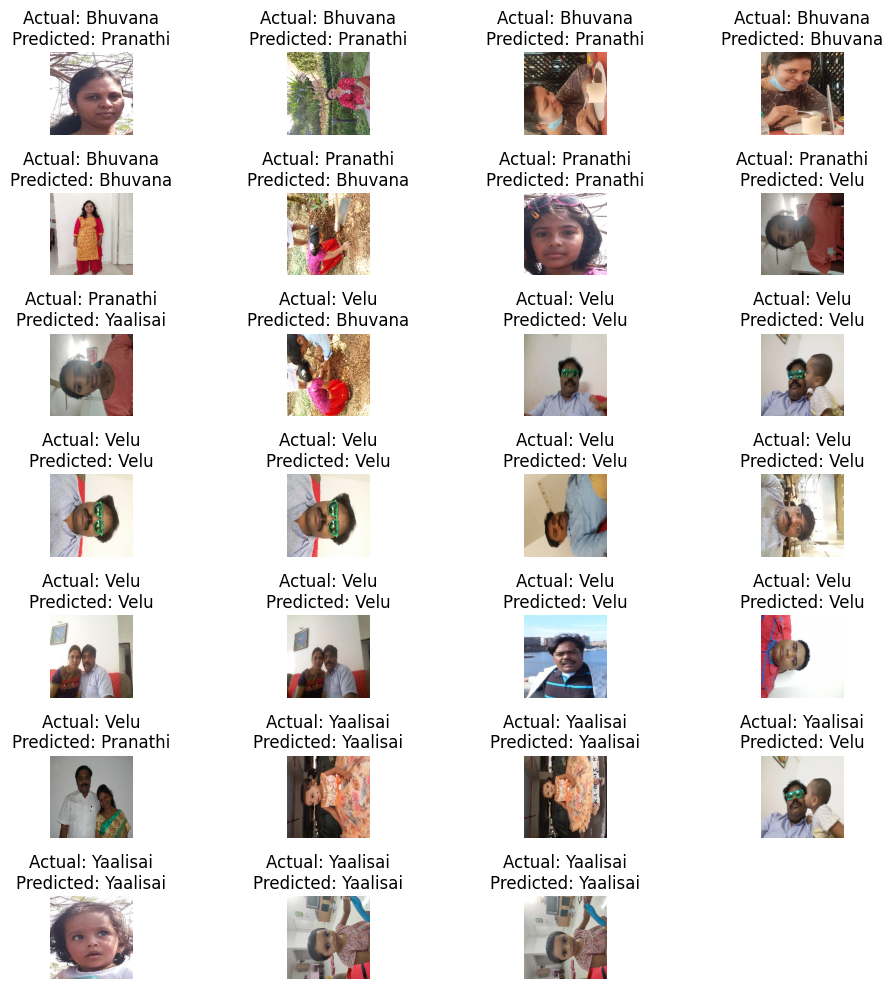

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model('my_transfer_learning_model.h5')

# Path to the test data folder
test_data_dir = 'Datasets/Test'

# List of class names (assuming the subdirectories in the test data folder are named after the classes)
class_names = sorted(os.listdir(test_data_dir))

# Prepare an empty list to store the actual and predicted class names
actual_class_names = []
predicted_class_names = []

# Prepare an empty list to store images for visualization
images_for_display = []

# Loop through the test data directory and predict each image
for class_name in class_names:
    class_dir = os.path.join(test_data_dir, class_name)
    for image_filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_filename)
        image = load_img(image_path, target_size=(img_width, img_height))
        image_array = img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)
        image_array /= 255.0  # Rescale pixel values to [0,1]

        # Predict the class label for the image
        predicted_class_probs = loaded_model.predict(image_array)
        predicted_class_idx = np.argmax(predicted_class_probs)
        predicted_class_name = class_names[predicted_class_idx]

        # Append the actual and predicted class names to the respective lists
        actual_class_names.append(class_name)
        predicted_class_names.append(predicted_class_name)

        # Append the image for visualization
        images_for_display.append((image, class_name, predicted_class_name))

# Display images with actual and predicted class names
plt.figure(figsize=(10, 10))
num_images = len(images_for_display)

for i, (image, actual_class_name, predicted_class_name) in enumerate(images_for_display):
    plt.subplot(num_images // 4 + 1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# New section